# PCA en imágenes RGB

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pythreejs as three
from IPython.display import display
import ipywidgets as widgets

In [2]:
imagen = Image.open('images.jpeg')  

In [3]:
pixeles = list(imagen.getdata())
print(len(pixeles))

50325


In [4]:
print(pixeles[0])

(0, 34, 0)


In [5]:
datos = np.array(pixeles)
print(pixeles[0])

(0, 34, 0)


In [6]:
matriz_covarianza= np.cov(datos, rowvar=False)
print(matriz_covarianza)

[[1606.98039437 1755.66009119  957.83887873]
 [1755.66009119 2010.38324255  994.24318995]
 [ 957.83887873  994.24318995  828.24853769]]


In [7]:
varianzas = matriz_covarianza.diagonal()
matriz_correlacion = matriz_covarianza / np.sqrt(np.outer(varianzas, varianzas))

print("Matriz de Correlación:")
print(matriz_correlacion)

Matriz de Correlación:
[[1.         0.97677766 0.83024608]
 [0.97677766 1.         0.77050038]
 [0.83024608 0.77050038 1.        ]]


In [8]:
matriz_correlacion2 = np.corrcoef(datos, rowvar=False)
print("Matriz de Correlación:")
print(matriz_correlacion2)

Matriz de Correlación:
[[1.         0.97677766 0.83024608]
 [0.97677766 1.         0.77050038]
 [0.83024608 0.77050038 1.        ]]


In [9]:
eigenvalores, eigenvectores = np.linalg.eig(matriz_covarianza)

print("Eigenvalores:")
print(eigenvalores)

print("\nEigenvectores:")
print(eigenvectores)

Eigenvalores:
[4149.09874662   30.62108451  265.89234348]

Eigenvectores:
[[ 0.61829144  0.78071298 -0.09057006]
 [ 0.68592456 -0.59226732 -0.42276107]
 [ 0.38369674 -0.19926533  0.90170402]]


In [10]:
# Calcular la suma de todos los eigenvalores
suma_total_eigenvalores = np.sum(eigenvalores)

# Calcular la proporción de la varianza explicada por cada eigenvector
proporcion_varianza_explicada = eigenvalores / suma_total_eigenvalores

print(suma_total_eigenvalores)
# Imprimir la proporción de la varianza explicada por cada eigenvector
for i, prop in enumerate(proporcion_varianza_explicada):
    print(f"Eigenvector {i + 1}: {prop:.4f}")

4445.612174613523
Eigenvector 1: 0.9333
Eigenvector 2: 0.0069
Eigenvector 3: 0.0598


In [11]:
vector_medio = np.mean(datos, axis=0)

print("Vector Medio (Medias de las Variables):")
print(vector_medio)

Vector Medio (Medias de las Variables):
[56.90237457 94.31272727 29.98549429]


In [12]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Graficar los datos en 3D
# ax.scatter(datos[:, 0], datos[:, 1], datos[:, 2], label='Datos', c='b', marker='o', alpha=0.1)

# # Graficar los ejes principales (eigenvectores) en 3D
# for i in range(len(eigenvalores)):
#     eigenvector = eigenvectores[:, i]
#     ax.quiver(0, 0, 0, eigenvector[0], eigenvector[1], eigenvector[2],
#               label=f'Eigenvector {i + 1}', color=f'C{i}')

# # Configurar etiquetas y leyenda
# ax.set_xlabel('Variable 1')
# ax.set_ylabel('Variable 2')
# ax.set_zlabel('Variable 3')
# ax.legend()

# # Mostrar el gráfico 3D
# plt.show()

In [12]:
variable1 = datos[:, 0]
variable2 = datos[:, 1]
variable3 = datos[:, 2]

In [14]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Asignar colores individualmente a cada punto de datos
# for i in range(len(variable1)):
#     color = (variable1[i]/255, variable2[i]/255, variable3[i]/255)  # Normaliza los valores para obtener colores RGB
#     ax.scatter(variable1[i], variable2[i], variable3[i], label='Variables', c=[color], marker='o')

# # Graficar los ejes principales (eigenvectores) en 3D
# for i in range(len(eigenvalores)):
#     eigenvector = eigenvectores[:, i]
#     ax.quiver(0, 0, 0, eigenvector[0], eigenvector[1], eigenvector[2],
#               label=f'Eigenvector {i + 1}', color=f'C{i}')

# # Configurar etiquetas y leyenda
# ax.set_xlabel('Variable 1')
# ax.set_ylabel('Variable 2')
# ax.set_zlabel('Variable 3')
# ax.legend()

# # Mostrar el gráfico 3D
# plt.show()

FloatSlider(value=20.0, description='Elevación:', max=90.0)

FloatSlider(value=0.0, description='Azimut:', max=360.0)

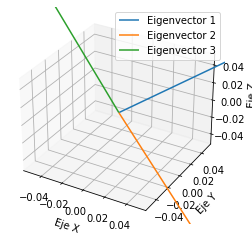

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los eigenvectores en 3D
for i in range(len(eigenvalores)):
    eigenvector = eigenvectores[:, i]
    ax.quiver(0, 0, 0, eigenvector[0], eigenvector[1], eigenvector[2],
              label=f'Eigenvector {i + 1}', color=f'C{i}')

# Configurar etiquetas y leyenda
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.legend()

# Función para habilitar la rotación interactiva
def rotate_view(elev, azim):
    ax.view_init(elev=elev, azim=azim)

# Crear widgets de interacción
elev_slider = widgets.FloatSlider(value=20, min=0, max=90, description='Elevación:')
azim_slider = widgets.FloatSlider(value=0, min=0, max=360, description='Azimut:')

# Conectar los sliders a la función de rotación
widgets.interactive(rotate_view, elev=elev_slider, azim=azim_slider)

# Mostrar los widgets
display(elev_slider, azim_slider)

# Mostrar el gráfico 3D de eigenvectores en el cuaderno Jupyter
plt.show()